In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import utils
import data_util
import test
% matplotlib inline

In [2]:
keep_out = 8
data = pd.read_csv('sorted_sales_qtr_fix.csv')
df = data.query('Store == 1').copy()
df.Weekly_Sales = df.Weekly_Sales * 0.1 #scale sales
X_train, X_test, y_train, y_test = data_util.get_x_y_split(df, keep_out)
#X prep
scaler = MinMaxScaler(feature_range = (0, 1))
continous = ['Fuel_Price', 'Unemployment', 'Temperature', 'CPI', 'rol_mean','Week']
X_train[continous] = scaler.fit_transform(X_train[continous])
X_test[continous] = scaler.transform(X_test[continous])
X_test.drop('rol_mean', axis = 1, inplace = True)
#Y prep
y_scaler = MinMaxScaler(feature_range = (0, 1))
y_train = pd.DataFrame(y_train, columns = ['Weekly_Sales']) 
y_test = pd.DataFrame(y_test, columns = ['Weekly_Sales']) 
y_train[['Weekly_Sales']] = y_scaler.fit_transform(y_train[['Weekly_Sales']])
y_test[['Weekly_Sales']] = y_scaler.transform(y_test[['Weekly_Sales']])

In [3]:
df.head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,qtr,year,Week,Day
0,1,2010-01-10,145332.950,0,71.89,2.603,211.671989,7.838,1,2010,1,Sunday
45,1,2010-02-04,159496.828,0,62.27,2.719,210.820450,7.808,1,2010,2,Thursday
90,1,2010-02-07,149241.814,0,80.91,2.669,211.223533,7.787,1,2010,3,Sunday
135,1,2010-02-12,164195.744,1,38.51,2.548,211.242170,8.106,1,2010,4,Friday
180,1,2010-02-19,161196.817,0,39.93,2.514,211.289143,8.106,1,2010,5,Friday
225,1,2010-02-26,140972.759,0,46.63,2.561,211.319643,8.106,1,2010,6,Friday
270,1,2010-03-09,154016.353,0,81.21,2.577,211.531248,7.787,1,2010,7,Tuesday
315,1,2010-03-12,154803.378,0,49.27,2.708,211.607193,7.838,1,2010,8,Friday
360,1,2010-03-19,147251.579,0,54.58,2.720,211.215635,8.106,1,2010,9,Friday
405,1,2010-03-26,140442.992,0,51.45,2.732,211.018042,8.106,1,2010,10,Friday


/Users/ericcriteser/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


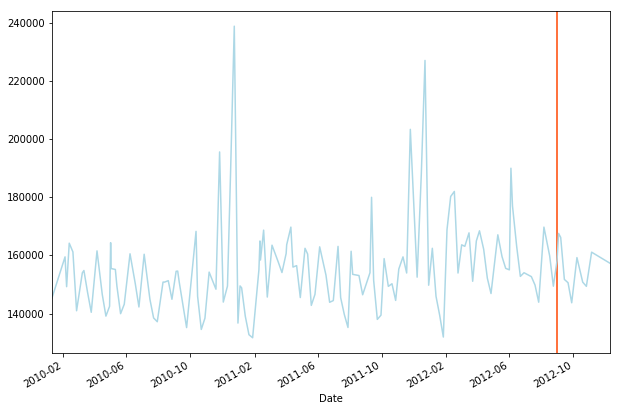

In [4]:
utils.plot_sales(df)

RMSE for predictions: 2224.57660935
RMSE for mean: 5524.06035912


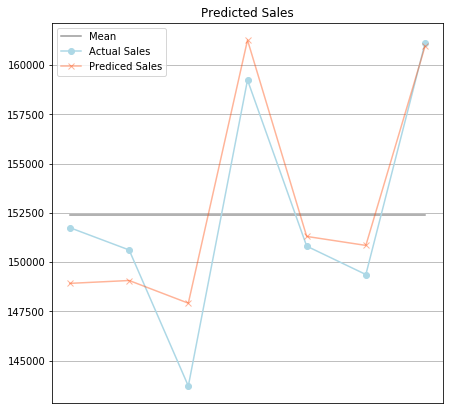

In [5]:
#Train regressor
preds = utils.train_reg(X_train, y_train, X_test)
#Plot predictions and actual sales
utils.plot_predicted_sales(y_test[:-1], y_scaler, preds[:-1], False)

RMSE for predictions: 2224.57660935
RMSE for mean: 5524.06035912


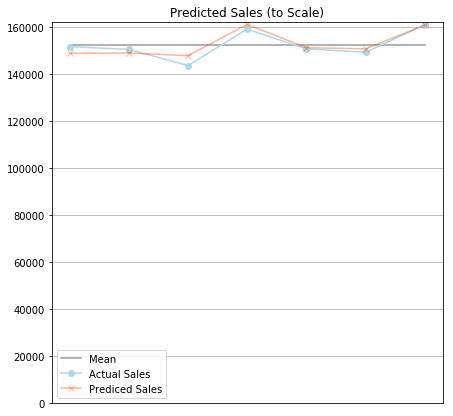

In [6]:
#Plot predictions and actual sales to scale
utils.plot_predicted_sales(y_test[:-1], y_scaler, preds[:-1], True)